# USED CARS PRICE PREDICTION

In [373]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

## Task 1: Data Collection & Loading
  -Sub-task 1.1: Import necessary libraries (pandas, numpy, etc.)  
  -Sub-task 1.2: Load dataset from CSV or Excel   
  -Sub-task 1.3: Display basic dataset info (shape, columns, types)   

---

In [374]:
df = pd.read_csv("used_car_price_dataset_extended.csv")
df

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,None,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,None,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1996,15.25,1500,Petrol,2,5498.71,Hyundai,Manual,Silver,None,0,Yes
9996,1997,14.45,5000,Diesel,1,9588.31,Honda,Manual,Gray,Full,0,Yes
9997,2002,19.41,1000,Diesel,4,4557.10,Kia,Manual,Black,Full,0,Yes
9998,2005,12.95,4000,Petrol,5,7413.59,BMW,Automatic,Blue,Full,0,Yes


In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  object 
 8   color               10000 non-null  object 
 9   service_history     10000 non-null  object 
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


In [376]:
list_catg = ['fuel_type', 'owner_count', 'brand','transmission', 'color',
             'service_history', 'accidents_reported', 'insurance_valid']
for i in list_catg :
    l_uni = df[i].tolist()
    unique_items = list(dict.fromkeys(l_uni))
    print(i)
    print(unique_items)
    print('\n')

fuel_type
['Petrol', 'Diesel', 'Electric']


owner_count
[4, 5, 1, 2, 3]


brand
['Chevrolet', 'Honda', 'BMW', 'Hyundai', 'Nissan', 'Tesla', 'Toyota', 'Kia', 'Volkswagen', 'Ford']


transmission
['Manual', 'Automatic']


color
['White', 'Black', 'Blue', 'Red', 'Gray', 'Silver']


service_history
['None', 'Full', 'Partial']


accidents_reported
[0, 1, 2, 3, 4, 5]


insurance_valid
['No', 'Yes']




In [377]:
list_catg_ii = ['make_year', 'mileage_kmpl', 'engine_cc']
for i in list_catg_ii :
    l_uni = df[i].tolist()
    m = min(l_uni)
    M = max(l_uni)
    unique_items = list(dict.fromkeys(l_uni))
    print(i,': min :',m,' max :',M)

make_year : min : 1995  max : 2023
mileage_kmpl : min : 5.0  max : 35.0
engine_cc : min : 800  max : 5000


In [378]:
df['accidents_reported'].value_counts().sort_index()

0    6081
1    3058
2     731
3     120
4       8
5       2
Name: accidents_reported, dtype: int64

---

## Task 2: Data Exploration (EDA)    
  -Sub-task 2.1: Describe statistics (mean, median, std)     
  -Sub-task 2.2: Visualize distributions (histograms, boxplots)   
  -Sub-task 2.3: Explore correlations with the target (`price`)     
  -Sub-task 2.4: Detect outliers

---

In [379]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_fea = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col != 'price_usd']

cat_cols = df.select_dtypes(include=['object']).columns.tolist()

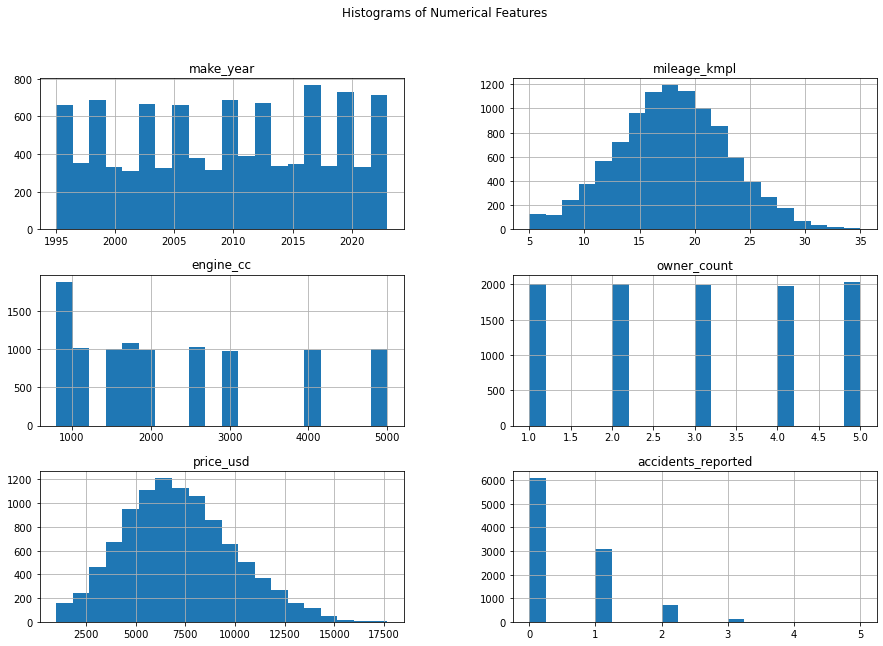

In [380]:
# Histograms for numerical features
df[num_cols].hist(bins=20, figsize=(15,10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

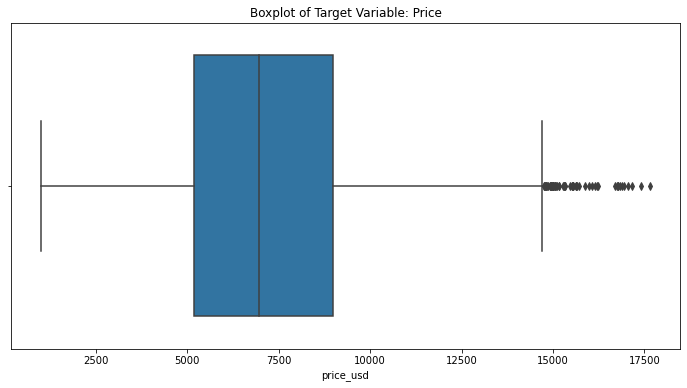

In [381]:
# Boxplots to detect spread and potential outliers for key variables
plt.figure(figsize=(12,6))
sns.boxplot(x=df['price_usd'])
plt.title("Boxplot of Target Variable: Price")
plt.show()

In [382]:
# Correlation matrix
corr_matrix = df.corr()
print("\nCorrelation with price:\n", corr_matrix['price_usd'].sort_values(ascending=False))


Correlation with price:
 price_usd             1.000000
engine_cc             0.678161
make_year             0.432603
mileage_kmpl          0.211971
accidents_reported   -0.001461
owner_count          -0.262266
Name: price_usd, dtype: float64


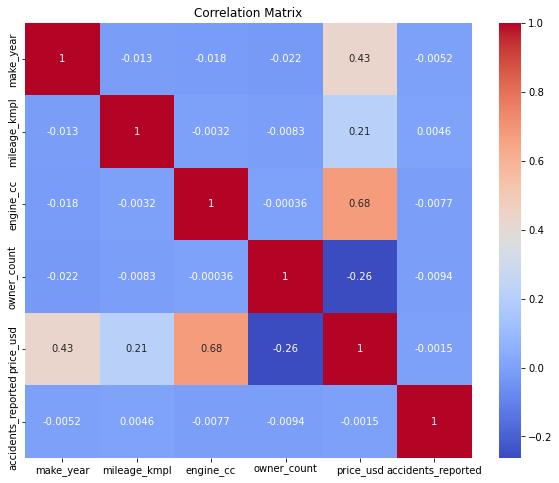

In [383]:
# Heatmap of correlations
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

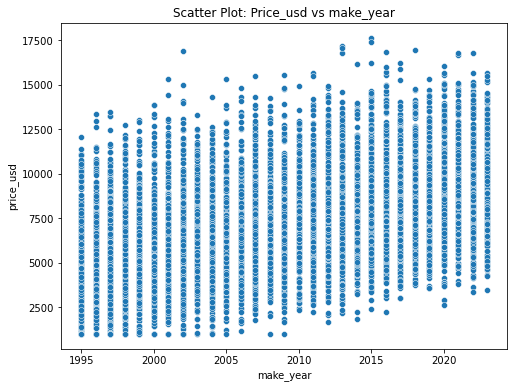

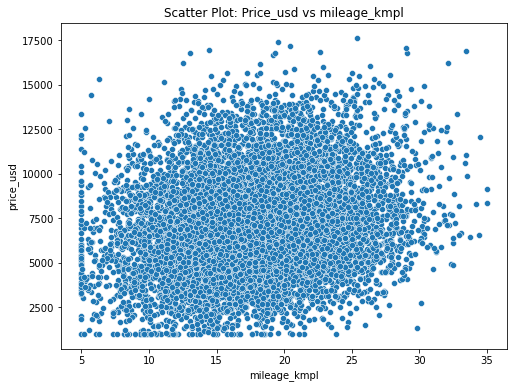

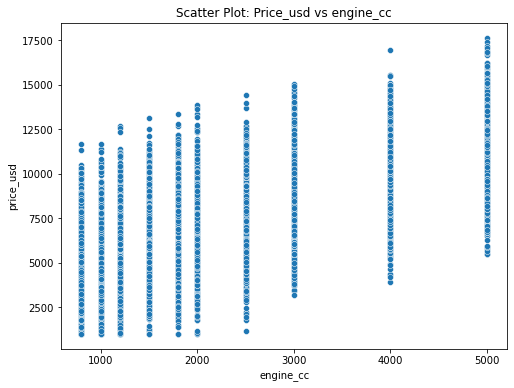

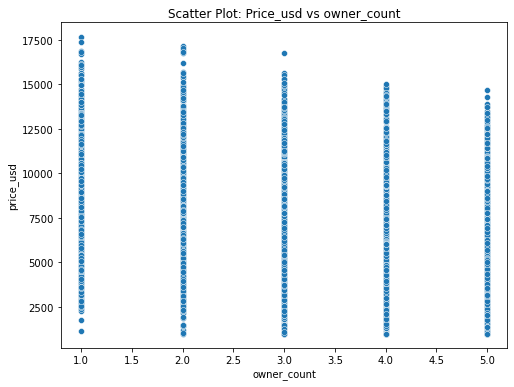

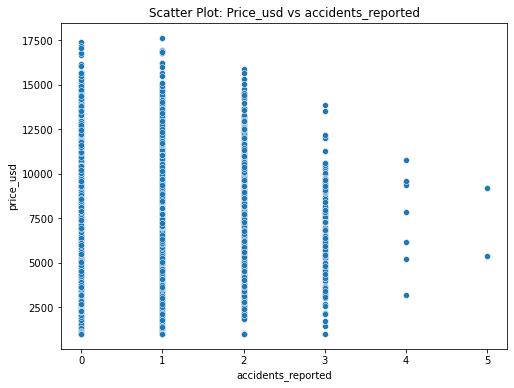

In [384]:
# Scatter plot : price vs mileage kmpl
for col in num_cols:
    if col != 'price_usd':
        plt.figure(figsize=(8,6))
        sns.scatterplot(x=col, y='price_usd', data=df)
        plt.title(f"Scatter Plot: Price_usd vs {col}")
        plt.show()

In [385]:
# List of numerical features to check

for feature in num_cols:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_low = df[df[feature] < lower_bound]
    outliers_high = df[df[feature] > upper_bound]
    
    print(f"Feature: {feature}")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    print(f"Number of low outliers: {len(outliers_low)}")
    print(f"Number of high outliers: {len(outliers_high)}")
    print('-'*40)


Feature: make_year
Lower bound: 1981.0, Upper bound: 2037.0
Number of low outliers: 0
Number of high outliers: 0
----------------------------------------
Feature: mileage_kmpl
Lower bound: 4.321249999999999, Upper bound: 31.57125
Number of low outliers: 0
Number of high outliers: 36
----------------------------------------
Feature: engine_cc
Lower bound: -1500.0, Upper bound: 5700.0
Number of low outliers: 0
Number of high outliers: 0
----------------------------------------
Feature: owner_count
Lower bound: -1.0, Upper bound: 7.0
Number of low outliers: 0
Number of high outliers: 0
----------------------------------------
Feature: price_usd
Lower bound: -549.2299999999987, Upper bound: 14719.509999999998
Number of low outliers: 0
Number of high outliers: 58
----------------------------------------
Feature: accidents_reported
Lower bound: -1.5, Upper bound: 2.5
Number of low outliers: 0
Number of high outliers: 130
----------------------------------------


In [386]:
# Select all object (string) columns except 'price' if it's object

# Create empty dict to store correlations
cat_price_corr = {}

for col in cat_cols:
    # One-Hot Encode the column
    dummies = pd.get_dummies(df[col], prefix=col)
    
    # Concatenate with price
    temp_df = pd.concat([df['price_usd'], dummies], axis=1)
    
    # Calculate correlations between price and each dummy column
    corrs = temp_df.corr()['price_usd'].drop('price_usd')  # remove self correlation
    
    # Store the correlations for this column
    cat_price_corr[col] = corrs
    
    print(f"\nCorrelations for categorical feature '{col}':")
    print(corrs.sort_values(ascending=False))

# Now, cat_price_corr contains correlation Series for each categorical variable



Correlations for categorical feature 'fuel_type':
fuel_type_Electric    0.312584
fuel_type_Diesel     -0.080423
fuel_type_Petrol     -0.106382
Name: price_usd, dtype: float64

Correlations for categorical feature 'brand':
brand_BMW           0.016295
brand_Ford          0.016184
brand_Volkswagen    0.007371
brand_Honda         0.003299
brand_Chevrolet     0.000349
brand_Hyundai      -0.002779
brand_Toyota       -0.004034
brand_Kia          -0.009598
brand_Nissan       -0.013087
brand_Tesla        -0.013639
Name: price_usd, dtype: float64

Correlations for categorical feature 'transmission':
transmission_Automatic    0.002771
transmission_Manual      -0.002771
Name: price_usd, dtype: float64

Correlations for categorical feature 'color':
color_Red       0.017251
color_Black     0.005960
color_Blue      0.002856
color_Gray      0.001725
color_White    -0.005093
color_Silver   -0.023013
Name: price_usd, dtype: float64

Correlations for categorical feature 'service_history':
service_histo

---
## Task 3: Data Cleaning 
  -Sub-task 3.1: Handle missing values (drop or impute)   
  -Sub-task 3.2: Remove or treat outliers   
  -Sub-task 3.3: Fix inconsistent or incorrect values (e.g., mileage = 0)   
  -Sub-task 3.4: Drop irrelevant columns (e.g., IDs, timestamps)   

---

In [387]:
# # Check missing values count per column
# print(df.isnull().sum())

# # Impute missing numerical values with median (better for skewed data)
# df_clean = df.dropna()
# for col in df_clean.select_dtypes(include=[np.number]).columns:
#     median_val = df_clean[col].median()
#     df_clean[col].fillna(median_val, inplace=True)

# # Impute missing categorical values with mode
# for col in df_clean.select_dtypes(include=['object']).columns:
#     mode_val = df_clean[col].mode()[0]
#     df_clean[col].fillna(mode_val, inplace=True)

In [388]:
# --- Remove or Treat Outliers ---

# Remove cars with price outside 1.5*IQR range

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_clean = df.dropna()
df_clean = remove_outliers(df_clean, 'price_usd')

In [389]:
# ---  Fix Inconsistent or Incorrect Values ---

for fea in num_cols:
    df_clean = df_clean[df_clean[fea] > 0]

In [390]:
# # ---  Drop Irrelevant Columns ---

# # Drop columns like IDs, timestamps, or columns not useful for prediction
# irrelevant_cols = ['car_id', 'seller_name', 'listing_date']  # example columns
# df_clean.drop(columns=[col for col in irrelevant_cols if col in df_clean.columns], inplace=True)

# # Final cleaned dataframe
# print(df_clean.info())

---

## Task 4: Feature Engineering
  -Sub-task 4.1: Convert categorical columns to category dtype     
  -Sub-task 4.2: Create new features (e.g., car age = current year - model year)   
  -Sub-task 4.3: Normalize or scale numerical features   
  -Sub-task 4.4: Encode categorical features (Label, One-Hot)   

---

In [391]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# --- Convert categorical columns to 'category' dtype (efficient) ---
for col in cat_cols:
    df_clean[col] = df_clean[col].astype('category')

In [392]:
# --- New features ---
df_clean['car_age'] = 2025 - df_clean['make_year']

In [393]:
num_cols.append('car_age')
num_fea = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col != 'price_usd']

In [394]:
# --- Normalize or scale numerical features (except 'prise_usd') ---

scaler = StandardScaler()
df_clean[num_fea] = scaler.fit_transform(df_clean[num_fea])

In [395]:
# --- Encode categorical features ---
# One-Hot Encoding (for non-ordinal categories)
df_encoded = pd.get_dummies(df_clean, columns=['brand','fuel_type', 'transmission', 'color', 'service_history', 'insurance_valid'], drop_first=True)

df_encoded.columns.tolist()

['make_year',
 'mileage_kmpl',
 'engine_cc',
 'owner_count',
 'price_usd',
 'accidents_reported',
 'car_age',
 'brand_Chevrolet',
 'brand_Ford',
 'brand_Honda',
 'brand_Hyundai',
 'brand_Kia',
 'brand_Nissan',
 'brand_Tesla',
 'brand_Toyota',
 'brand_Volkswagen',
 'fuel_type_Electric',
 'fuel_type_Petrol',
 'transmission_Manual',
 'color_Blue',
 'color_Gray',
 'color_Red',
 'color_Silver',
 'color_White',
 'service_history_None',
 'service_history_Partial',
 'insurance_valid_Yes']

---

## Task 5: Data Splitting   
  -Sub-task 5.1: Split the dataset into train and test sets   
  -Sub-task 5.2: Optionally, create a validation set or use cross-validation   

---

In [396]:
from sklearn.model_selection import train_test_split

In [397]:
# Features and target
X = df_encoded.drop('price_usd', axis=1)
y = df_encoded['price_usd']

# First split: train + temp (80%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Second split: validation + test (split temp 50-50)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train size: {X_train.shape[0]} samples")
print(f"Validation size: {X_val.shape[0]} samples")
print(f"Test size: {X_test.shape[0]} samples")

Train size: 3113 samples
Validation size: 389 samples
Test size: 390 samples


---

## Task 6: Model Selection & Training   
  -Sub-task 6.1: Try different regression models (e.g., Linear, Decision Tree, Random Forest, XGBoost)   
  -Sub-task 6.2: Train models on training data   
  -Sub-task 6.3: Evaluate models using metrics (RMSE, MAE, R²)   

---

---

## Task 7: Model Evaluation   
  -Sub-task 7.1: Predict prices on test data   
  -Sub-task 7.2: Compare predictions vs actual values   
  -Sub-task 7.3: Visualize results (scatter plot, residual plot)   
  -Sub-task 7.4: Select the best-performing model   

---

---

## Task 8: Hyperparameter Tuning    
  -Sub-task 8.1: Use GridSearchCV or RandomizedSearchCV   
  -Sub-task 8.2: Re-train model with best parameters   
  -Sub-task 8.3: Re-evaluate the tuned model   

---

---

**Task 9: Model Saving & Deployment (Optional)**   
  -Sub-task 9.1: Save model using `joblib` or `pickle`   
  -Sub-task 9.2: Create a simple API (Flask/FastAPI)   
  -Sub-task 9.3: Build a web interface (e.g., Streamlit or HTML)   
  -Sub-task 9.4: Deploy on Heroku, Render, etc.   

---